In [1]:
from numbers import Number

import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.utils import broadcast_all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [5]:
X = np.array([2, 2, 2, 1, 2, 3, 30, 0, 1])

hist_vals, bins = np.histogram(X, bins = [0, 1,  7, 10, 30, 50, 60, 70, 80, 90])

print("hist_vals: \n", hist_vals)
print("bins: \n ", bins)

hist_vals: 
 [1 7 0 0 1 0 0 0 0]
bins: 
  [ 0  1  7 10 30 50 60 70 80 90]


In [21]:
#create gaussian data sample
n = 1000
normal_dist = torch.distributions.Normal(torch.tensor([10.0]), torch.tensor([2]))
gaussian_sample = normal_dist.sample((n,1)).squeeze()
#calculate histogram
#number of bins: number of bins within the range
histogram_gaussian, bins_gaussian = np.histogram(gaussian_sample.numpy(), bins = 20, range = (0, 20))
#normalize the histogram to estimate a density function
p_gaussian = torch.tensor(histogram_gaussian / histogram_gaussian.sum())



In [19]:
#create exponential sample
lambda_dist = 0.5
exponential_dist = torch.distributions.exponential.Exponential(lambda_dist)
exponential_sample = exponential_dist.sample((n,1)).squeeze()
#number of bins: number of bins within the range
histogram_exponential, bins_exponential = np.histogram(exponential_sample.numpy(), bins = 20, range = (0, 20))
#normalize the histogram to estimate a density function
p_exponential = torch.tensor(histogram_exponential / histogram_exponential.sum())

## Histogram with fixed bin size

Width:  1.0


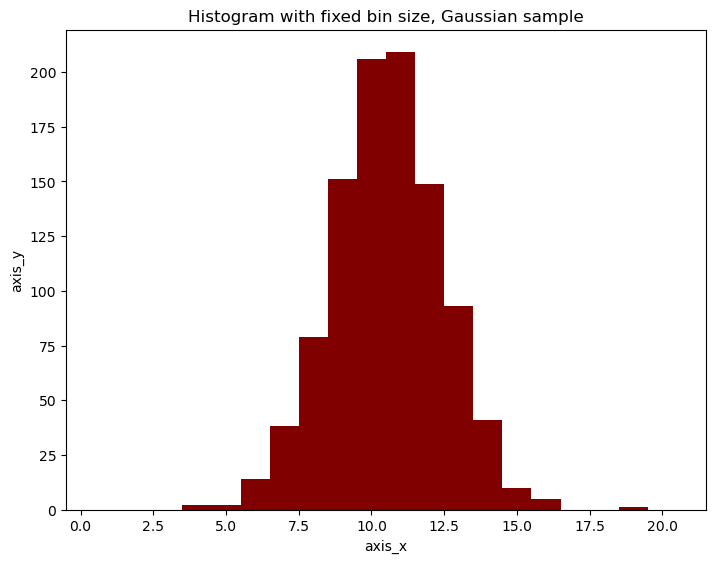

NameError: name 'bins_exponential' is not defined

In [9]:
def plot_bar(bins, histogram, axis_x_label, axis_y_label, title):    
    
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    #calculate the width of the histogram bins displayed
    width = np.max(bins) / bins.shape[0]
    print("Width: ", width)
    axes.bar(bins[0:].tolist(), histogram.tolist(), color ='maroon', width = width)
    plt.xlabel(axis_x_label)
    plt.ylabel(axis_y_label)
    plt.title(title)
    plt.show()
    
#plot histogram
plot_bar(bins_gaussian[1:], histogram_gaussian, "axis_x", "axis_y", "Histogram with fixed bin size, Gaussian sample")
plot_bar(bins_exponential[1:], histogram_exponential, "axis_x", "axis_y", "Histogram with fixed bin size, Exponential sample")

### Quartile, Quintile, and Decile plot
Quartile plot divides the bins in 4 ranges to create a histogram, quintile plot in 5 ranges, and decile plot in 10 ranges

## Histogram with variable bin size
Useful for distributions with subdomains with very low frequency

bins_gaussian_variable  [ 1  5  8  9 10 11 12 13 20]
Width:  [4 3 1 1 1 1 1 7]


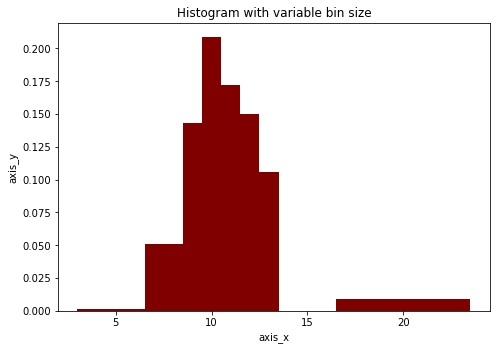

In [6]:
def plot_bar_variable_width(bins, histogram, axis_x_label, axis_y_label, title):    
    
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    #calculate the width of the histogram bins displayed
    widths = bins[1:] - bins[0:-1]
    print("Width: ", widths)
    axes.bar(bins[1:].tolist(), histogram.tolist(), color ='maroon', width = widths)
    plt.xlabel(axis_x_label)
    plt.ylabel(axis_y_label)
    plt.title(title)
    plt.show()


#select different bins, making different bin sizes
#density = True calculates the normalized histogram
histogram_gaussian_variable, bins_gaussian_variable = np.histogram(gaussian_sample.numpy(), density = True, bins = [1, 5, 8, 9, 10, 11, 12, 13, 20], range = (0, 20))
print("bins_gaussian_variable ", bins_gaussian_variable)
#plot histogram
plot_bar_variable_width(bins_gaussian_variable, histogram_gaussian_variable, "axis_x", "axis_y", "Histogram with variable bin size")


# Cumulative density
Distribution function approximation

Density function
Width:  1.0


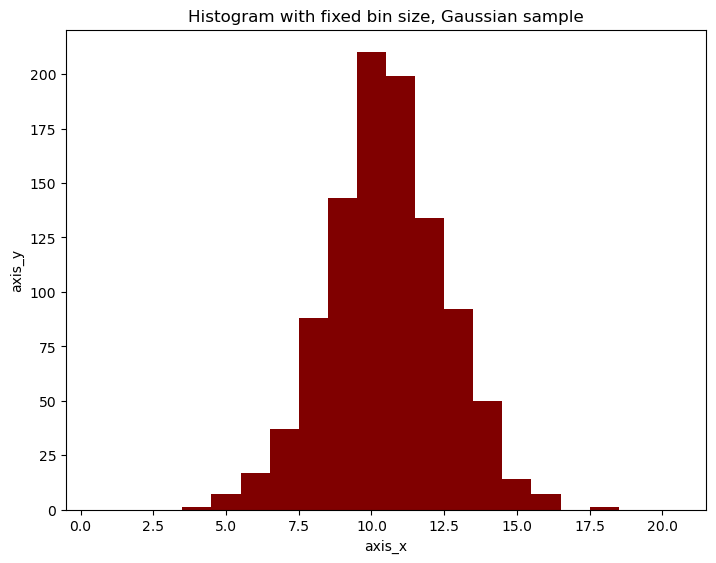

cum_sum_gaussian 
  [   11.70096     21.671404    33.145294    43.332726    51.922302
    63.345078    73.50088     87.729645    99.6972     109.05008
   119.709595   130.18747    139.3129     150.65005    163.25998
   172.311      181.16187    189.68103    198.09879    209.46501
   223.72264    234.19742    243.5548     252.04385    260.5133
   270.5421     277.60632    290.89636    299.17136    308.79013
   318.729      330.9138     340.87       353.91986    364.7165
   372.84586    383.93494    391.636      400.25772    410.9762
   420.17993    429.61993    443.54025    452.20465    462.52185
   470.69327    484.4899     495.98767    508.20224    514.0812
   522.697      534.8813     544.3285     554.05054    563.40826
   572.13855    581.87024    590.6911     596.73505    606.0779
   615.43024    626.07916    639.13916    646.9511     655.7333
   668.36304    678.8        687.6726     698.6431     706.06964
   719.1152     726.00586    738.55975    748.22516    758.03705
   768.950

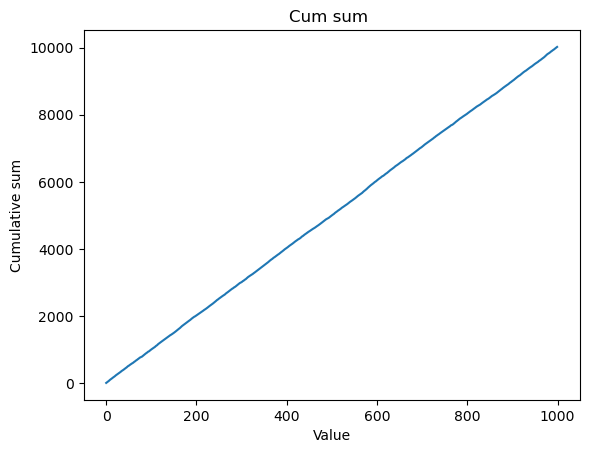

In [16]:
#create gaussian data sample
n = 1000
normal_dist = torch.distributions.Normal(torch.tensor([10.0]), torch.tensor([2]))
gaussian_sample = normal_dist.sample((n,1)).squeeze()
#calculate histogram
#number of bins: number of bins within the range
histogram_gaussian, bins_gaussian = np.histogram(gaussian_sample.numpy(), bins = 20, range = (0, 20))
#normalize the histogram to estimate a density function
p_gaussian = torch.tensor(histogram_gaussian / histogram_gaussian.sum())
print("Density function")
plot_bar(bins_gaussian[1:], histogram_gaussian, "axis_x", "axis_y", "Histogram with fixed bin size, Gaussian sample")
#distribution function
cum_sum_gaussian = np.cumsum(gaussian_sample.numpy())
plt.plot(cum_sum_gaussian)
 
print("cum_sum_gaussian \n ", cum_sum_gaussian)    
    
plt.xlabel("Value")
plt.ylabel("Cumulative sum")
plt.title("Cum sum ")
plt.show()


## Stem and leaf plot
Stem and Leaf Plot is a way of representing the data. This plot is used to show the absolute frequency in different classes similar to the frequency distribution table or a histogram. It presents the quantitative data in the graphical format, and the stem-and-leaf plot of quantitative data is said as textual graph as that presents the data according to their most significant 
numeric digit. Stem and Leaf Plot graph is mainly suitable for smaller data sets.
https://pypi.org/project/stemgraphic/

In [6]:
import sys
!{sys.executable} -m pip install stemgraphic

(<Figure size 750x200 with 1 Axes>, <Axes: >)

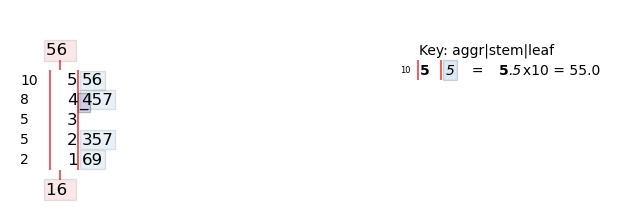

In [7]:

# importing the module
import stemgraphic
  
data = [16, 25, 47, 56, 23, 45, 19, 55, 44, 27]
  
# calling stem_graphic with required parameters,
# data and scale
stemgraphic.stem_graphic(data, scale = 10)

## Box plot (Whisker plot)
The box plot describes mean, standard deviation and outliers in the data. 

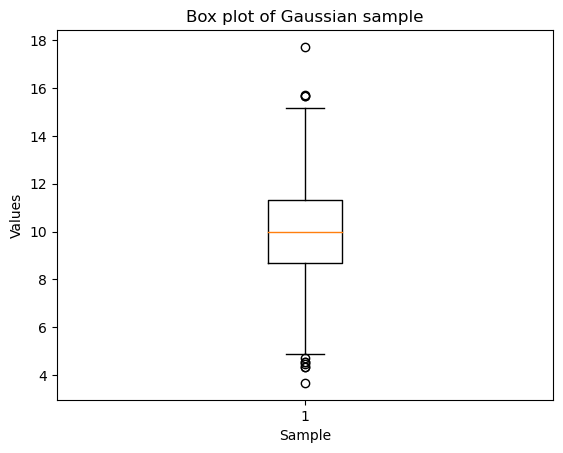

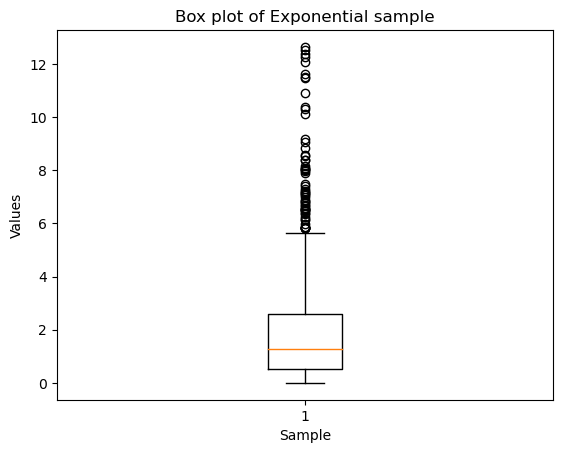

In [21]:
def display_box_plot(data, axis_x_label, axis_y_label, title):
    
    # Creating plot
    fig = plt.figure()  
    plt.boxplot(data)
    plt.xlabel(axis_x_label)
    plt.ylabel(axis_y_label)
    plt.title(title)
    plt.show()
    
    
   
display_box_plot(gaussian_sample.numpy(), "Sample", "Values", "Box plot of Gaussian sample")
display_box_plot(exponential_sample.numpy(), "Sample", "Values", "Box plot of Exponential sample")


## Probability plot or P-P plot
Used to graphically analyze whether a sample is drawn from a specific model. 

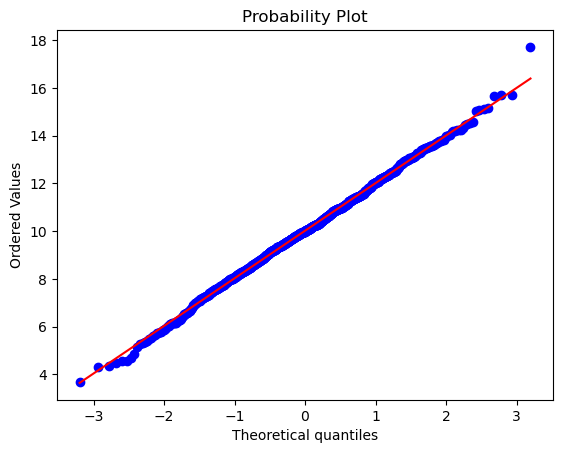

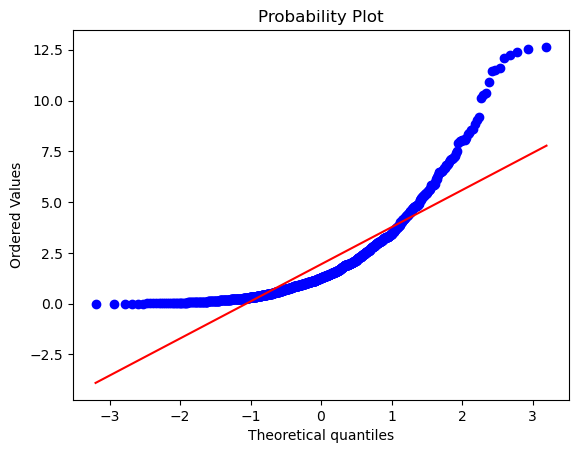

In [23]:
#scipy implements the pp plot.
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
plt.title("P-P diagram de los datos con dist. Gaussiana")
res1 = stats.probplot(gaussian_sample, plot=plt, dist = 'norm')

fig = plt.figure()
plt.title("P-P diagram de los datos con dist. Exponencial")
res2 = stats.probplot(exponential_sample, plot=plt, dist = 'norm')

## Pearson coefficient visualization using heat matrix

          0         1         2         3         4         5         6  \
0  1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
1  0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
2  0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
3 -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
4 -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
5  0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
6 -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
7  0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
8  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

          7         8  
0  0.544341  0.221898  
1  0.263514  0.466581  
2  0.239528  0.065068  
3 -0.113970  0.074752  
4 -0.042163  0.130548  
5  0.036242  0.292695  
6  0.033561  0.173844  
7  1.000000  0.238356  
8  0.238356  1.000000  


<AxesSubplot:>

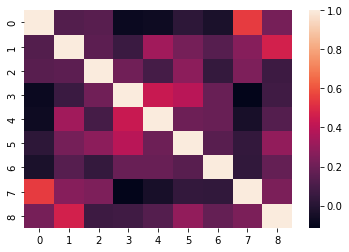

In [3]:
from pandas import read_csv
from scipy import stats
import numpy as np
import seaborn as sns


diabetes_path = "pima-indians-diabetes.csv"
#read the data_frame
dataframe = read_csv(diabetes_path, header=None)
#get values, not labels
corr_mat = dataframe.corr()
print(corr_mat)
round(corr_mat,2)
#use seaborn to draw a heat matrix
sns.heatmap(corr_mat)
